# Waiter Tips Prediction

## import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## EDA

In [73]:
df = pd.read_csv("https://raw.githubusercontent.com/fatemearyaie/Waiter-Tips-Prediction/main/tips.csv")

In [74]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [75]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [76]:
df.shape

(244, 7)

In [77]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [79]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [80]:
df['sex'] = df['sex'].map({"Female":1, "Male":0})
df['smoker'] = df['smoker'].map({"Yes":1, "No":0})
df['time'] = df['time'].map({"Lunch":0, "Dinner":1})
df['day'] = df['day'].map({"Sun":0, "Thur":1, "Fri":2, "Sat":3})

## Query 

* We can use pandas to query our data but now I want to use SQL 

In [81]:
from pandasql import sqldf

In [82]:
mysql = lambda q : sqldf(q, globals())

In [83]:
#get max and min tip that costumer gave
mysql("SELECT MAX(tip), MIN(tip) FROM df")

,MAX(tip),MIN(tip)
0,10.0,1.0


In [84]:
#get total_bill and tip for whome gave more than 3 tip
mysql("SELECT tip, total_bill, day FROM df WHERE tip>3\
      ORDER BY tip LIMIT 5")

,tip,total_bill,day
0,3.02,14.83,0
1,3.06,13.94,0
2,3.07,16.93,3
3,3.08,17.92,3
4,3.09,30.14,3


In [85]:
#get total_bill and tip for whome had over average meal
mysql("SELECT tip, total_bill FROM df WHERE (SELECT AVG(total_bill) FROM df)>total_bill\
      LIMIT 5")

,tip,total_bill
0,1.01,16.99
1,1.66,10.34
2,2.00,8.77
3,1.96,15.04
4,3.23,14.78


In [86]:
#get sum of tips on dinner/launch
mysql("SELECT time,SUM(tip) AS 'total tip' FROM df GROUP BY time")

,time,total tip
0,0,185.51
1,1,546.07


In [87]:
#get count of tips on days of week
mysql("SELECT day, COUNT(tip) AS tip FROM df GROUP BY day ORDER BY tip ASC")

,day,tip
0,2,19
1,1,62
2,0,76
3,3,87


## Visualization

<AxesSubplot:>

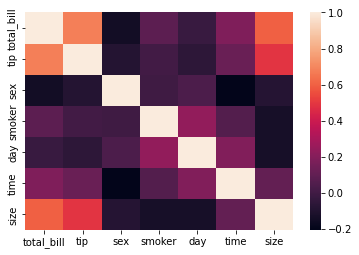

In [88]:
corr = df.corr()
sns.heatmap(corr)

In [89]:
px.scatter(data_frame=df, x='total_bill', y='tip', size='size', color='day',trendline="ols")

In [90]:
px.scatter(data_frame=df, x='total_bill', y='tip', trendline='ols', size='tip', color='time')

<BarContainer object of 244 artists>

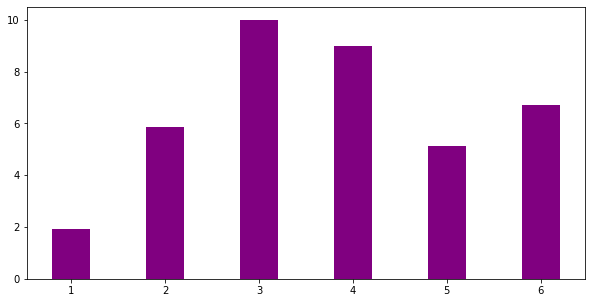

In [91]:
fig = plt.figure(figsize = (10, 5))
plt.bar(list(df['size']), list(df['tip']), width = 0.4, color='purple')

In [92]:
px.pie(df, values='tip', names='day')

In [93]:
px.pie(df, values='tip', names='sex', hole=0.5)

In [94]:
px.pie(df, values='tip', names='smoker')

## model development

In [95]:
X = df[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]
Y = df[['tip']]

In [96]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [97]:
transform = preprocessing.StandardScaler()

In [98]:
X = transform.fit_transform(X)
Y = transform.fit_transform(Y)

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=2, test_size=0.2)

In [100]:
lr = LinearRegression()

In [101]:
lr.fit(X_train, Y_train)

LinearRegression()

In [102]:
prediction = lr.predict(X_test)

## Evaliuation

In [103]:
lr.score(X_test, Y_test)

0.5695256434844846

In [104]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [105]:
print(mean_squared_error(Y_test, prediction))

0.49774062589835066


In [106]:
print(mean_absolute_error(Y_test, prediction))

0.4902663693763272


## Visual Evaliuation

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



<AxesSubplot:ylabel='Density'>

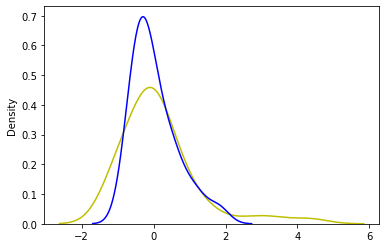

In [107]:
ax1 = sns.distplot(Y_test, hist=False, color='y')
sns.distplot(prediction, hist=False, ax=ax1, color='b')